### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [54]:
import pandas as pd

df_diabetes = pd.read_csv("data/diabetes.csv")
df_diabetes.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [55]:
x = df_diabetes.drop(columns="diabetes")
y = df_diabetes["diabetes"]

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [56]:
from sklearn.model_selection import train_test_split

SEED = 5

x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=SEED)
x_train, x_validation, y_train, y_validation = train_test_split(x, y, stratify=y, random_state=SEED)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def fit_score_pipeline(model, x_train, y_train, x_validation, y_validation):
    model.fit(x_train, y_train)
    return model.score(x_train, y_train), model.score(x_validation, y_validation)

models = [
    DecisionTreeClassifier(max_depth=2, random_state=SEED),
    RandomForestClassifier(max_depth=2, random_state=SEED)
]

for model in models:
    score_train, score_validation = fit_score_pipeline(model, x_train, y_train, x_validation, y_validation)
    print(f"Modelo: {model}")
    print(f'Acurácia de treino: {score_train:.2f}%')
    print(f'Acurácia de validação: {score_validation:.2f}%')
    print("\n")

Modelo: DecisionTreeClassifier(max_depth=2, random_state=5)
Acurácia de treino: 0.73%
Acurácia de validação: 0.65%


Modelo: RandomForestClassifier(max_depth=2, random_state=5)
Acurácia de treino: 0.77%
Acurácia de validação: 0.65%




### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [58]:
from sklearn.metrics import confusion_matrix

import plotly.graph_objects as go

def plotly_confusion_matrix(confusion_matrix, model):
    confusion_matrix = confusion_matrix[::-1]
    title_text = f"Matriz de Confusão<br><sup style='color: blue;'>Modelo: {model}</sup>"
    classes = ["Não diabético", "Diabético"]
    fig = go.Figure(
        go.Heatmap(
            z=confusion_matrix,
            x=classes,
            y=classes[::-1],
            text=confusion_matrix,
            texttemplate="%{text}",
            colorscale="viridis"

        )
    )
    fig.update_layout(
        title=title_text,
        xaxis_title='Previstos',
        yaxis_title='Verdadeiros'
    )

    fig.show()

for model in models:
    y_predict = model.predict(x_validation)
    plotly_confusion_matrix(confusion_matrix(y_validation, y_predict), model)

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [59]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

for model in models:
    y_predict = model.predict(x_validation)
    print(model)
    print(f"Acurácia: {accuracy_score(y_validation, y_predict)}")
    print(f"Recall: {recall_score(y_validation, y_predict)}")
    print(f"Precisão: {precision_score(y_validation, y_predict)}")
    print(f"F1-Score: {f1_score(y_validation, y_predict)}")
    print("\n")

DecisionTreeClassifier(max_depth=2, random_state=5)
Acurácia: 0.6547619047619048
Recall: 0.5714285714285714
Precisão: 0.48484848484848486
F1-Score: 0.5245901639344263


RandomForestClassifier(max_depth=2, random_state=5)
Acurácia: 0.6547619047619048
Recall: 0.17857142857142858
Precisão: 0.45454545454545453
F1-Score: 0.2564102564102564




### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

Text(0.5, 0.98, 'Comparação da curva ROC')

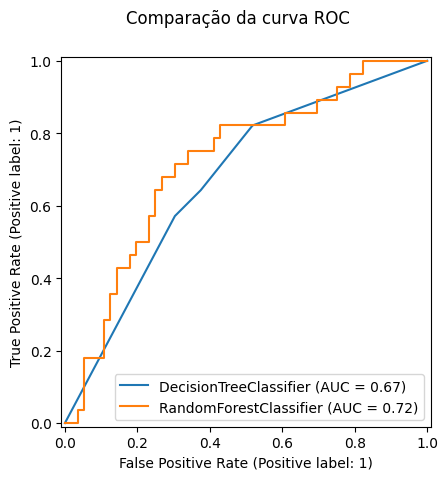

In [60]:
from sklearn.metrics import RocCurveDisplay

forest_classifier_fig = RocCurveDisplay.from_estimator(models[0], x_validation, y_validation)
random_forest_classifier_fig = RocCurveDisplay.from_estimator(models[1], x_validation, y_validation, ax=forest_classifier_fig.ax_)
random_forest_classifier_fig.figure_.suptitle("Comparação da curva ROC")

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

Text(0.5, 0.98, 'Comparação da curva Precisão x Recall')

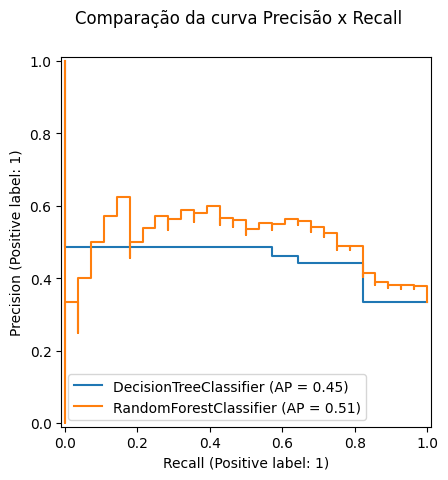

In [61]:
from sklearn.metrics import PrecisionRecallDisplay

forest_classifier_fig = PrecisionRecallDisplay.from_estimator(models[0], x_validation, y_validation)
random_forest_classifier_fig = PrecisionRecallDisplay.from_estimator(models[1], x_validation, y_validation, ax=forest_classifier_fig.ax_)
random_forest_classifier_fig.figure_.suptitle("Comparação da curva Precisão x Recall")

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [62]:
from sklearn.metrics import classification_report

for model in models:
    y_predict = model.predict(x_validation)
    print(model)
    print(classification_report(y_validation, y_predict))
    print("\n")

DecisionTreeClassifier(max_depth=2, random_state=5)
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        56
           1       0.48      0.57      0.52        28

    accuracy                           0.65        84
   macro avg       0.62      0.63      0.63        84
weighted avg       0.67      0.65      0.66        84



RandomForestClassifier(max_depth=2, random_state=5)
              precision    recall  f1-score   support

           0       0.68      0.89      0.78        56
           1       0.45      0.18      0.26        28

    accuracy                           0.65        84
   macro avg       0.57      0.54      0.52        84
weighted avg       0.61      0.65      0.60        84





# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [63]:
def confidence_interval(model, cv_results, score):
    mean = cv_results.mean()
    std = cv_results.std()
    print(f"Modelo: {model}")
    print(f'Intervalo de confiança ({score}): [{(mean - 2*std):.2f}, {min(mean + 2*std, 1):.2f}]')

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [64]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=SEED)
score = "accuracy"
for model in models:
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=score)
    confidence_interval(model, cv_results, score)

Modelo: DecisionTreeClassifier(max_depth=2, random_state=5)
Intervalo de confiança (accuracy): [0.55, 0.78]
Modelo: RandomForestClassifier(max_depth=2, random_state=5)
Intervalo de confiança (accuracy): [0.48, 0.88]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [65]:
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
score = "accuracy"
for model in models:
    cv_results = cross_val_score(model, x, y, cv=stratified_kfold, scoring=score)
    confidence_interval(model, cv_results, score)

Modelo: DecisionTreeClassifier(max_depth=2, random_state=5)
Intervalo de confiança (accuracy): [0.50, 0.80]
Modelo: RandomForestClassifier(max_depth=2, random_state=5)
Intervalo de confiança (accuracy): [0.60, 0.79]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [66]:
from sklearn.model_selection import LeaveOneOut

leave_one_out = LeaveOneOut()
score = "accuracy"
for model in models:
    cv_results = cross_val_score(model, x, y, cv=leave_one_out, scoring=score)
    print(f"Modelo: {model}")
    print(f"Média ({score}): {cv_results.mean():.2f}")
    

Modelo: DecisionTreeClassifier(max_depth=2, random_state=5)
Média (accuracy): 0.64
Modelo: RandomForestClassifier(max_depth=2, random_state=5)
Média (accuracy): 0.69


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [67]:
import plotly.express as px

counts = df_diabetes["diabetes"].value_counts()
plot_data = pd.DataFrame({'Classe': counts.index, 'Contagem': counts.values})
plot_data.replace({0:"Não diabético", 1: "Diabético"}, inplace=True)

px.bar(
    plot_data, 
    x='Classe', 
    y='Contagem',
    color='Classe',
    title='Comparação de contagem entre as classes'
)

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

oversampling = SMOTE()
for model in models:
    pipeline = imbpipeline([("oversampling", oversampling), (f"{model}", model)])
    score = "f1"
    cv_results = cross_val_score(pipeline, x, y, cv=stratified_kfold, scoring=score)
    print(f"Modelo: {model}")
    print(f"Média ({score}): {cv_results.mean():.2f}")

Modelo: DecisionTreeClassifier(max_depth=2, random_state=5)
Média (f1): 0.60
Modelo: RandomForestClassifier(max_depth=2, random_state=5)
Média (f1): 0.64


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [69]:
from imblearn.under_sampling import NearMiss

undersampling = NearMiss(version=3)
for model in models:
    pipeline = imbpipeline([("undersampling", undersampling), (f"{model}", model)])
    score = "f1"
    cv_results = cross_val_score(pipeline, x, y, cv=stratified_kfold, scoring=score)
    print(f"Modelo: {model}")
    print(f"Média ({score}): {cv_results.mean():.2f}")

Modelo: DecisionTreeClassifier(max_depth=2, random_state=5)
Média (f1): 0.60
Modelo: RandomForestClassifier(max_depth=2, random_state=5)
Média (f1): 0.60


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [71]:
oversampling = SMOTE()
x_balanced, y_balanced = oversampling.fit_resample(x, y)

model = models[1]
model.fit(x_balanced, y_balanced)
y_predicted = model.predict(x_test)
print(classification_report(y_test, y_predicted))
plotly_confusion_matrix(confusion_matrix(y_test, y_predicted), model)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        40
           1       0.50      0.75      0.60        20

    accuracy                           0.67        60
   macro avg       0.67      0.69      0.66        60
weighted avg       0.72      0.67      0.68        60

